In [2]:
import matplotlib as plt
# from tensorflow import keras
from file_io import features_from_file, labels_from_file, add_history
from utils import labels_to_categorical, transpose_vector, get_count, get_mean_stddev, normalize_data,norm_multiple
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf


In [3]:
age_model = tf.keras.models.load_model("model/cnns_age_54/Users_60.keras")

input_test_file_gender = "age_data_clean_test/age_in"
output_test_file_gender = "age_data_clean_test/age_out"

In [4]:

input_test = features_from_file(input_test_file_gender, 54)
input_test = transpose_vector(input_test)
output_test = labels_from_file(output_test_file_gender)
output_test = labels_to_categorical(output_test)

X_age_test = input_test
Y_age_test = output_test

In [5]:
means, std_dev = get_mean_stddev(X_age_test)
X_age_test = normalize_data(X_age_test, means, std_dev)

In [6]:
y_pred = age_model.predict(X_age_test)

25/25 [==============================] - 0s 3ms/step


In [7]:
max_indices = np.argmax(y_pred, axis=1)
y_pred[:] = 0
# Set the maximum value in each row to 1
for i, max_index in enumerate(max_indices):
    y_pred[i, max_index] = 1

y_pred

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [8]:
current_matrix = np.array([[1],[2],[3],[4],[5]])
Y_age_test_class = Y_age_test @ current_matrix
Y_age_test_class = Y_age_test_class[:,0].T

In [9]:
y_pred_class = y_pred @ current_matrix
y_pred_class = y_pred_class[:,0].T

In [10]:
conf_matrix = confusion_matrix(Y_age_test_class, y_pred_class)
row_sums = conf_matrix.sum(axis=1)
norm_conf_matrix = conf_matrix / row_sums[:, np.newaxis]
acc_score = accuracy_score(Y_age_test_class, y_pred_class)
print("Score of prediction:", acc_score)

Score of prediction: 0.60875


In [11]:
labels = [ "fifties_sixties","fourties", "teens",
    "thirties", "twenties"]


<Axes: >

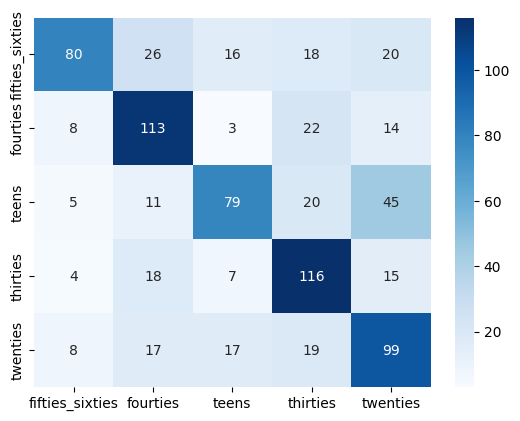

In [12]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

<Axes: >

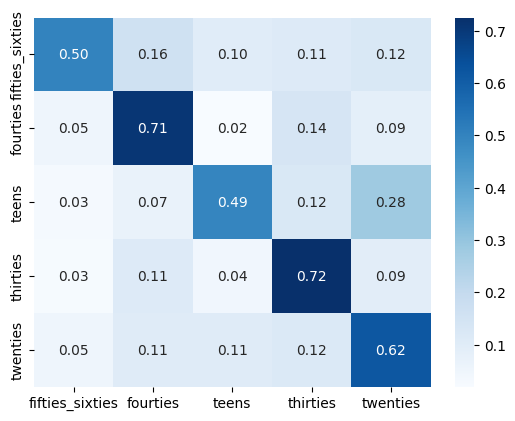

In [13]:
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels)

In [14]:
report = classification_report(Y_age_test_class, y_pred_class, target_names=labels, digits=5)
print(report)

                 precision    recall  f1-score   support

fifties_sixties    0.76190   0.50000   0.60377       160
       fourties    0.61081   0.70625   0.65507       160
          teens    0.64754   0.49375   0.56028       160
       thirties    0.59487   0.72500   0.65352       160
       twenties    0.51295   0.61875   0.56091       160

       accuracy                        0.60875       800
      macro avg    0.62562   0.60875   0.60671       800
   weighted avg    0.62562   0.60875   0.60671       800



C:\Users\admin\AppData\Local\Temp\ipykernel_19324\3770540850.py:6: WavFileWarning: Reached EOF prematurely; finished at 2512332 bytes, expected 2512340 bytes from header.
  sample_rate, data = wavfile.read('C:/Users/admin/Documents/AgeDetection/voice-bases-age-gender-classification/audio/female2_2.wav')


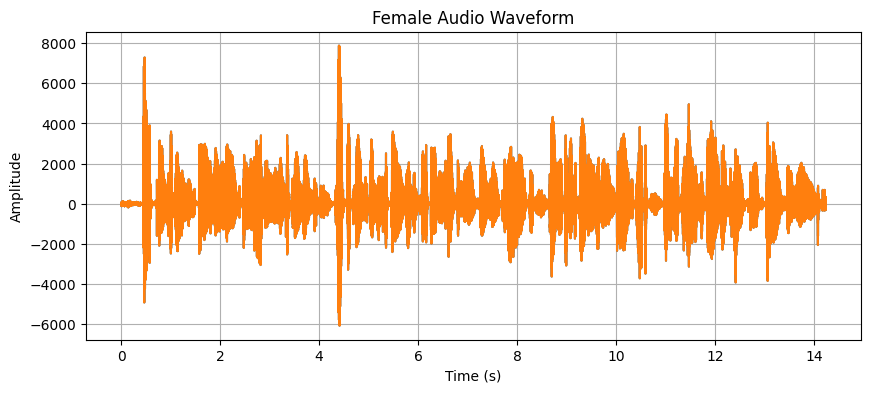

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load the audio file
sample_rate, data = wavfile.read('C:/Users/admin/Documents/AgeDetection/voice-bases-age-gender-classification/audio/female2_2.wav')

# Calculate the time array
time = np.arange(0, len(data)) / sample_rate

# Plot the waveform
plt.figure(figsize=(10, 4))
plt.plot(time, data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Female Audio Waveform')
plt.grid(True)
plt.show()

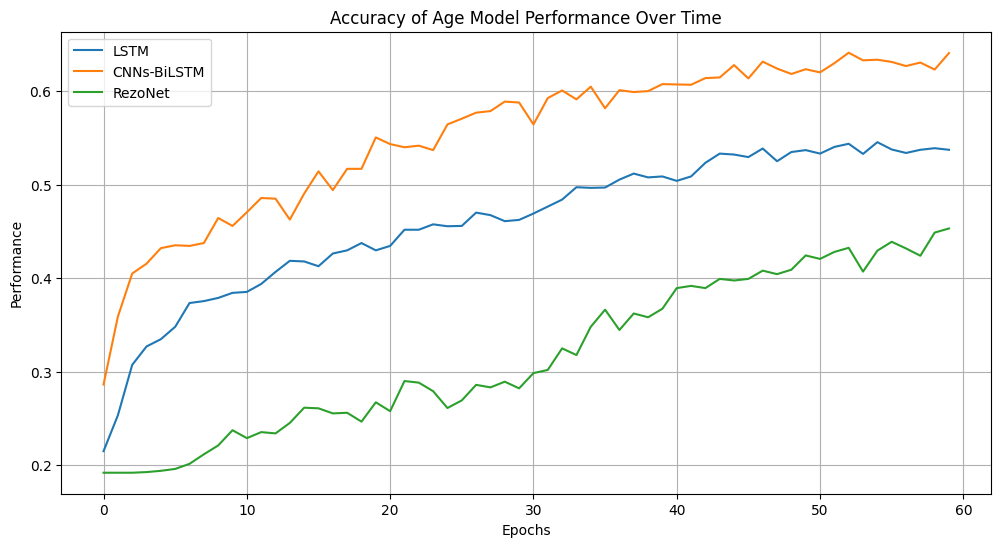

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Age_valid_accuracy.csv")


# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['LSTM'], linestyle='-', label='LSTM')
plt.plot(df.index, df['CNNs-BiLSTM'], linestyle='-', label='CNNs-BiLSTM')
plt.plot(df.index, df['RezoNet'], linestyle='-', label='RezoNet')

# Adding titles and labels
plt.title('Accuracy of Age Model Performance Over Time')
plt.xlabel('Epochs')
plt.ylabel('Performance')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

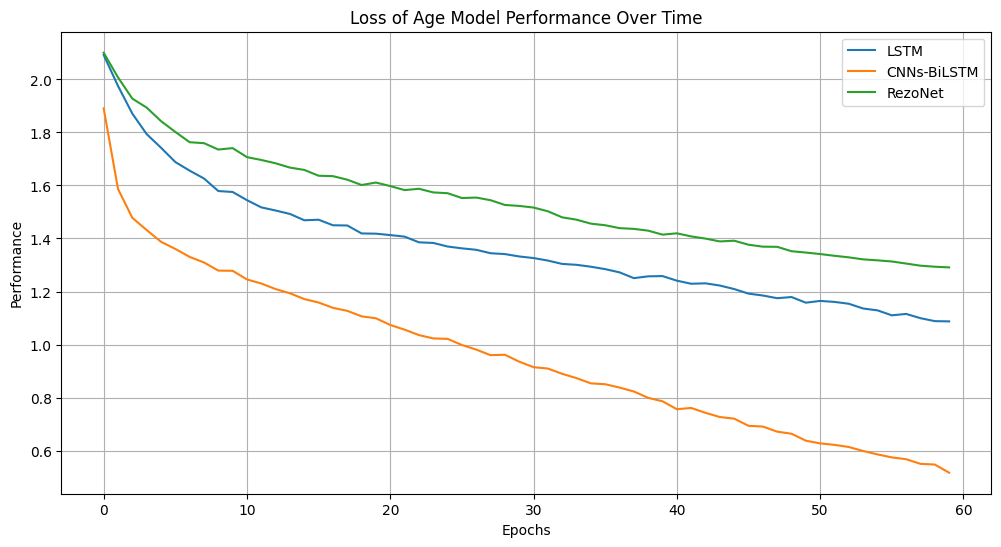

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Age_valid_loss.csv")


# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['LSTM'], linestyle='-', label='LSTM')
plt.plot(df.index, df['CNNs-BiLSTM'], linestyle='-', label='CNNs-BiLSTM')
plt.plot(df.index, df['RezoNet'], linestyle='-', label='RezoNet')

# Adding titles and labels
plt.title('Loss of Age Model Performance Over Time')
plt.xlabel('Epochs')
plt.ylabel('Performance')
plt.legend()
plt.grid(True)

# Show plot
plt.show()